# Beer Advocate Review Challenge

# Challenge Questions:
1. Which brewery produces the strongest beers by ABV%?
2. If you had to pick 3 beers to recommend using only this data, which would you pick?
3. Which of the factors (aroma, taste, appearance, palette) are most important indetermining the overall quality of a beer?
4. Lastly, if I typically enjoy a beer due to its aroma and appearance, which beer style should I try?

In [1]:
import os
import tarfile
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [2]:
beerData = pd.read_csv("D:/code/socialmediadata-beeradvocate/beer_reviews.csv")
display(beerData[:1].head())

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986


In [3]:
beerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
brewery_id            1586614 non-null int64
brewery_name          1586599 non-null object
review_time           1586614 non-null int64
review_overall        1586614 non-null float64
review_aroma          1586614 non-null float64
review_appearance     1586614 non-null float64
review_profilename    1586266 non-null object
beer_style            1586614 non-null object
review_palate         1586614 non-null float64
review_taste          1586614 non-null float64
beer_name             1586614 non-null object
beer_abv              1518829 non-null float64
beer_beerid           1586614 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


# 1. brewery produces the strongest beers by ABV%

To get the brewery which produces the strongest beers by ABV %, I have taken the mean of ABV for each brewery name, since we have lot of reviewers for each beer.

In [4]:
data = beerData.groupby('brewery_name').beer_abv.mean()
strongABV = pd.DataFrame(data.reset_index())

strongABV.columns = ['brewery_name', 'beer_abv_mean']

strongestBeer = strongABV[strongABV.beer_abv_mean == strongABV.beer_abv_mean.max()]
strongestBeer

,brewery_name,beer_abv_mean
4667,Schorschbräu,19.228824


In [5]:
strongestBeerDetails = beerData[beerData.beer_abv == beerData.beer_abv.max()]
strongestBeerDetails[['brewery_name','beer_abv', 'beer_beerid']]

,brewery_name,beer_abv,beer_beerid
12919,Schorschbräu,57.7,73368


# 2. If you had to pick 3 beers to recommend using only this data, which would you pick ?

To pick the 3 beers to recommend using this data, I have selected below features to calculate the mean and get top 3 beers.
1) review_overall, 
2) review_aroma, 
3) review_appearance 
4) review_palate, 
5) review_taste
6) beer_abv

In [6]:
aggrData = beerData.groupby('beer_beerid').agg({'review_overall': np.mean,
                                'review_aroma': np.mean,
                                'review_appearance': np.mean,
                                'review_palate': np.mean,     
                                'review_taste': np.mean,
                                'beer_abv': np.mean})

selected = pd.DataFrame(aggrData.reset_index())

topBeers = selected.sort_values(['review_overall', 'review_aroma','review_appearance','review_palate','review_taste','beer_abv'], ascending=[False,False, False, False, False, False])
print(topBeers[:3])

       beer_beerid  review_overall  review_aroma  review_appearance  \
46212        55451             5.0           5.0                5.0   
64816        75956             5.0           5.0                5.0   
40090        48325             5.0           5.0                5.0   

       review_palate  review_taste  beer_abv  
46212            5.0           5.0      13.0  
64816            5.0           5.0      11.0  
40090            5.0           5.0      10.5  


# 3. Which of the factors (aroma, taste, appearance, palette) are most important in determining the overall quality of a beer ?

In [7]:
features = beerData[['review_overall','review_aroma','review_taste','review_appearance','review_palate']]
features.head()

,review_overall,review_aroma,review_taste,review_appearance,review_palate
0,1.5,2.0,1.5,2.5,1.5
1,3.0,2.5,3.0,3.0,3.0
2,3.0,2.5,3.0,3.0,3.0
3,3.0,3.0,3.0,3.5,2.5
4,4.0,4.5,4.5,4.0,4.0


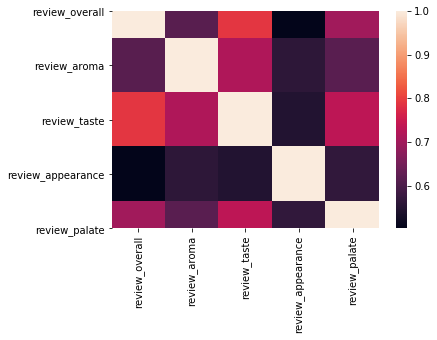

In [8]:
correlation = features.corr()
sns.heatmap(correlation, 
            xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values)
plt.show()


In [9]:
display(features.corr())

,review_overall,review_aroma,review_taste,review_appearance,review_palate
review_overall,1.000000,0.616013,0.789816,0.501732,0.701914
review_aroma,0.616013,1.000000,0.716776,0.561029,0.616947
review_taste,0.789816,0.716776,1.000000,0.546980,0.734135
review_appearance,0.501732,0.561029,0.546980,1.000000,0.566634
review_palate,0.701914,0.616947,0.734135,0.566634,1.000000


# Review Overall has a high and positive correlation with review taste of .79 and this tells me that Review Overall has strong relationship with the review taste

# 4. Lastly, if I typically enjoy a beer due to its aroma and appearance, which beer style should I try ?

In [10]:
subData = beerData[['review_aroma','review_appearance','beer_style']]
subData.head()

,review_aroma,review_appearance,beer_style
0,2.0,2.5,Hefeweizen
1,2.5,3.0,English Strong Ale
2,2.5,3.0,Foreign / Export Stout
3,3.0,3.5,German Pilsener
4,4.5,4.0,American Double / Imperial IPA


In [11]:
# grouping the data by beer style and compute its each average score of aroma and appearance
bs_df = beerData.groupby(['beer_style'])['review_aroma', 'review_appearance'].mean().round(3)
# Calculating the combined score of aroma and appearance
bs_df['Combined Scores'] = (bs_df['review_aroma'] + bs_df['review_appearance'])/2.0

In [12]:
display(bs_df.sort_values(by=['Combined Scores'],ascending=False))

,review_aroma,review_appearance,Combined Scores
beer_style,,,
American Double / Imperial Stout,4.161,4.164,4.1625
Russian Imperial Stout,4.077,4.210,4.1435
Quadrupel (Quad),4.133,4.118,4.1255
American Double / Imperial IPA,4.098,4.079,4.0885
Gueuze,4.118,4.035,4.0765
...,...,...,...
Happoshu,2.595,2.925,2.7600
Low Alcohol Beer,2.463,2.918,2.6905
American Adjunct Lager,2.480,2.789,2.6345


According to the above list, we can figure out that American Double / Imperial Stout has highest value when we combine review_aroma and review_appearance which is 4.1625.